In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

df = pd.read_csv('clean_city_data.csv') # read data from the final csv (to get the sum of amount awarded for each city) 

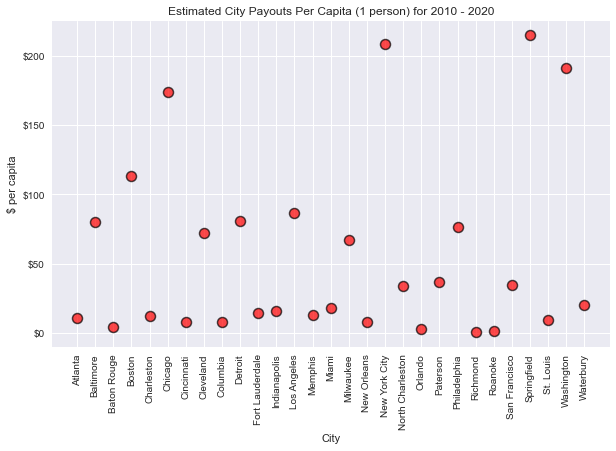

In [2]:
pd.set_option('display.float_format', lambda x: '%.f' % x) # removes scientific notation of numbers
df2 = df.groupby(['city'], as_index=False)['amount_awarded'].sum().round() # grouped the total of amount awarded per city, and rounded it for flat numbers. Index set to false so that the city column is not used as the index, and creates a numerical system for index instead
df3 = df2.sort_values(['city'], ascending=True) # used to display the amount awarded dataframe in alphebetical order by city column
pop = pd.read_csv('population_data.csv') # read data from the population csv (2nd csv, will combine data from 2 csvs to create a plot)
pop2 = pop.groupby(['city_name'], as_index=False)[['Estimates Base']].sum() # grouped the total of estimates base per city. Index set to false so that the city column is not used as the index, and creates a numerical system for index instead
pop2.drop([12], inplace=True) # dropped the cities that were not usuable
pop2.reset_index(drop=True, inplace=True) # reset the index numerically, after rows
frames = [pop2, df3] # set the 2 data frames with the information that I need, and assigned them to a variable
result = pd.concat(frames, axis=1) # concatted the dataframes, and set them side by side instead of one on top of the other
result.drop(columns=['city_name'], inplace=True) # removed the extra column city_name
first_column = result.pop('city') # remove city from current column, and assigned it to first_column variable
result.insert(0, 'city', first_column) # assigned city to be the first column for easier read
middle_column = result.pop('amount_awarded') # remove amount awarded from current column, assigned it to middle_column variable
result.insert(1, 'amount_awarded', middle_column) # assigned amount awarded to be the middle column for easier read
result['per_capita'] = result['amount_awarded']/result['Estimates Base'] # created a fourth column called per_capita, with the results of dividing the amount awarded column by the estimates base column

plt.style.use('seaborn') # to get seaborn style plot layout
fig, ax = plt.subplots(figsize=(10, 6)) # plotting one subplot with defined figure size
ax.scatter(x = result['city'], y = result['per_capita'], s= 100, color = "red", edgecolors = "black", linewidths = 1.5, alpha = 0.7) # customizing scatter plot to show the data that I want it to display

plt.title('Estimated City Payouts Per Capita (1 person) for 2010 - 2020') # setting the title of the plot
plt.xlabel("City") # setting the x axis label
plt.xticks(rotation=90) # rotating the x ticks 90 degrees so they display vertically
plt.ylabel("$ per capita") # setting the y axis label
ax.yaxis.set_major_formatter('${x:,.0f}') # formatting the text on the y axis to include the $ sign and commas

plt.show()